In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
# !sudo apt-get install unzip

In [4]:
# !curl --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (Windows NT 6.3; Win64; x64; rv:62.0) Gecko/20100101 Firefox/62.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://www.kaggle.com/' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/7327/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1536742173&Signature=GKk9A78mpG%2F4bWvHWxNVdXjntZMjCbG%2BgFfZRdInkbsz6CSwxsbixkOr1uNbBKJvArNYGv4dAO1%2B%2FbM%2BpfaylyRQ5fworzb%2Bgp%2BLMUOA7PW3egT0wSPm43PB3brFoaVXCfDUtU%2FHLYxReg9N4ojirJLnl3%2FxoXw8ToQti%2BsWrQodFfBMdps%2FFxBFNWJQRq0SBDJo79ZwK5YekZe8RrAub9TKv4%2B9lKCi7pm4l%2FZidFSwzye1%2FfNCHqppcq9IPMdeRMxVZ4HqIOqOScc8E%2B1cKEImqJZ3bYPa2PKTi%2F3EkjvrwOaO7ITZhP%2BnU9mHUFRo29VlDOCVLuh3%2BiBfJbklaA%3D%3D' --output 'all.zip'

In [5]:
# mv /home/ubuntu/fastai/courses/dl1/all.zip /home/ubuntu/fastai/courses/dl1/data

In [6]:
# ls /home/ubuntu/fastai/courses/dl1/data

In [7]:
# %cd /home/ubuntu/fastai/courses/dl1/data


In [8]:
# !unzip -q all.zip

# !unzip -q train.zip
# !unzip -q test.zip


In [4]:
PATH='/home/ubuntu/fastai/courses/dl1/data/'

In [5]:
torch.cuda.set_device(0)

In [6]:
import pandas as pd
import numpy as np
labels_df=pd.read_csv(f'{PATH}labels.csv')
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
# PATH = "data/dogbreed/"
sz = 224
arch = resnet34
bs = 58

In [8]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1 # header is not counted (-1)
val_idxs = get_cv_idxs(n) # random 20% data for validation set

In [9]:
labels_df.pivot_table(index="breed", aggfunc=len).sort_values('id', ascending=False)

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


In [10]:
def get_data(sz, bs): # sz: image size, bs: batch size
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test',
                                       val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)
    return data
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/13
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/37
#     return data if sz > 300 else data.resize(340, 'tmp') # Reading the jpgs and resizing is slow for big images, so resizing them all to 340 first saves time


In [11]:
data = get_data(sz, bs)

In [48]:
# ! wget 'http://files.fast.ai/models/weights.tgz' 

In [12]:
pwd

'/home/ubuntu/fastai/courses/dl1'

In [35]:
mv  /home/ubuntu/fastai/courses/dl1/weights.tgz /home/ubuntu/fastai/courses/dl1/fastai/

In [36]:
%cd /home/ubuntu/fastai/courses/dl1/fastai/

/home/ubuntu/fastai/fastai


In [37]:
!tar -xvzf weights.tgz

weights/
weights/wrn_50_2f.pth
weights/resnext_101_32x4d.pth
weights/resnext_101_64x4d.pth
weights/inceptionresnetv2-d579a627.pth
weights/inceptionv4-97ef9c30.pth
weights/resnext_50_32x4d.pth


In [13]:
%cd /home/ubuntu/fastai/courses/dl1/data

/home/ubuntu/fastai/courses/dl1/data


In [11]:
# pwd

'/home/ubuntu/fastai/courses/dl1'

In [14]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [15]:
learn.lr_find()

 71%|███████   | 100/141 [00:01<00:00, 53.99it/s, loss=4]  


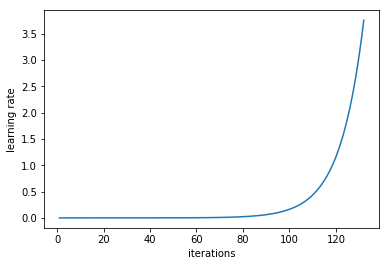

In [16]:
learn.sched.plot_lr()

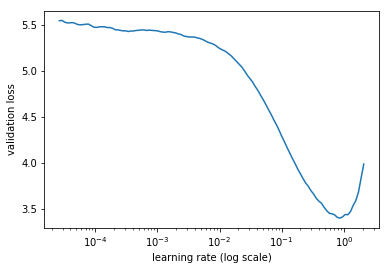

In [17]:
learn.sched.plot()

In [18]:
learn.fit(1e-1, 5)

epoch      trn_loss   val_loss   accuracy   
    0      1.237393   0.713828   0.782779  
    1      0.784486   0.657055   0.805284  
    2      0.633709   0.61741    0.816047  
    3      0.516777   0.590221   0.828767  
    4      0.439072   0.655595   0.814579  



[array([0.65559]), 0.8145792641168471]

In [20]:
learn.precompute=False
learn.fit(1e-1,3,cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.556442   0.547242   0.835127  
    1      0.499792   0.528266   0.836106  
    2      0.466585   0.528288   0.835616  



[array([0.52829]), 0.8356164447132155]

In [21]:
# Overfitting , so big arch and big images

In [23]:
sz=299
bs=64
# arch=resnext101_64

In [24]:
learn.set_data(get_data(299, bs))

In [26]:
learn.fit(1e-1, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.463059   0.483693   0.85225   
    1      0.421158   0.477935   0.856164  
    2      0.398529   0.474186   0.855675  



[array([0.47419]), 0.8556751465377509]

In [27]:
learn.unfreeze()
lr=np.array([1e-3,1e-2,1e-1])

In [28]:
learn.precompute=False
learn.fit(lr,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      1.156995   0.756211   0.773483  
    1      0.97384    0.901114   0.730431  
  7%|▋         | 9/128 [00:21<04:45,  2.40s/it, loss=0.912]

KeyboardInterrupt: 

In [29]:
# PATH = "data/dogbreed/"
sz = 224
arch = resnext101_64
bs = 58

In [30]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1 # header is not counted (-1)
val_idxs = get_cv_idxs(n) # random 20% data for validation set

In [31]:
def get_data(sz, bs): # sz: image size, bs: batch size
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test',
                                       val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)
    
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/13
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/37
    return data if sz > 300 else data.resize(340, 'tmp') # Reading the jpgs and resizing is slow for big images, so resizing them all to 340 first saves time

#Source:   
#    def resize(self, targ, new_path):
#        new_ds = []
#        dls = [self.trn_dl,self.val_dl,self.fix_dl,self.aug_dl]
#        if self.test_dl: dls += [self.test_dl, self.test_aug_dl]
#        else: dls += [None,None]
#        t = tqdm_notebook(dls)
#        for dl in t: new_ds.append(self.resized(dl, targ, new_path))
#        t.close()
#        return self.__class__(new_ds[0].path, new_ds, self.bs, self.num_workers, self.classes)
#File:      ~/fastai/courses/dl1/fastai/dataset.py

In [32]:
data = get_data(sz, bs)

In [33]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 179/179 [05:19<00:00,  1.78s/it]


In [34]:
learn.lr_find()

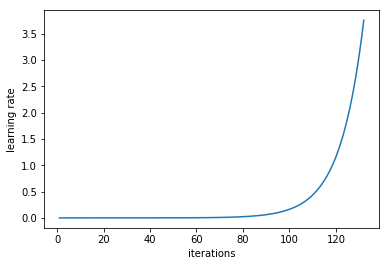

In [35]:
learn.sched.plot_lr()

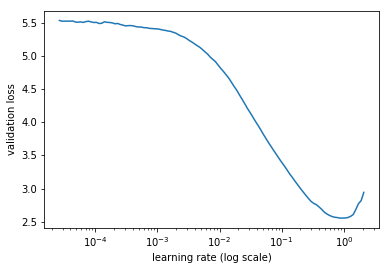

In [36]:
learn.sched.plot()

In [37]:
learn.fit(1e-2, 5)

epoch      trn_loss   val_loss   accuracy   
    0      0.931249   0.388606   0.903131  
    1      0.430796   0.296414   0.915362  
    2      0.301283   0.26763    0.920254  
    3      0.229835   0.251903   0.922701  
    4      0.185269   0.248956   0.922701  


[array([0.24896]), 0.9227005828266741]

In [38]:
from sklearn import metrics

In [39]:
data = get_data(sz, bs)

In [40]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [41]:
learn.fit(1e-2, 2)

epoch      trn_loss   val_loss   accuracy   
    0      1.118812   0.412541   0.903131  
    1      0.528302   0.301189   0.916341  


[array([0.30119]), 0.9163405138219173]

In [42]:
learn.precompute = False

In [43]:
learn.fit(1e-2, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.46907    0.276272   0.916341  
    1      0.416044   0.259533   0.918787  
    2      0.381029   0.247916   0.921722  
    3      0.352778   0.248525   0.921233  
    4      0.333591   0.239551   0.921722  


[array([0.23955]), 0.9217221137945433]

In [44]:
learn.save('224_pre')

In [45]:
learn.load('224_pre')

In [46]:
learn.set_data(get_data(299, bs)) 
learn.freeze()

In [47]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 299, 299]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 75, 75]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 75, 

In [48]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.346594   0.229505   0.924168  
    1      0.306449   0.233084   0.923679  
    2      0.287693   0.22849    0.92319   


[array([0.22849]), 0.9231898257993671]

In [49]:
# When you are under fitting, it means cycle_len=1 is too short (learning rate is getting reset before it had the chance to zoom in properly).
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2) # 1+2+4 = 7 epochs

epoch      trn_loss   val_loss   accuracy   
    0      0.281908   0.227373   0.926125  
    1      0.268807   0.21792    0.925636  
    2      0.240109   0.217409   0.928082  
    3      0.243347   0.221138   0.922211  
    4      0.232811   0.218336   0.931996  
    5      0.205628   0.215469   0.932975  
    6      0.193439   0.217095   0.931507  


[array([0.21709]), 0.9315068548556177]

In [50]:
log_preds, y = learn.TTA() # (5, 2044, 120), (2044,)
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.9344422700587084, 0.2143822794833466)

In [51]:
len(data.val_ds.y), data.val_ds.y[:5]

(2044, array([19, 15,  7, 99, 73]))

In [52]:
learn.save('299_pre')

In [53]:
learn.load('299_pre')